In [1]:
import requests
import zipfile
from pathlib import Path

In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [3]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [4]:
train_dir = image_path/"train"
test_dir = image_path/"test"

In [5]:
class_names = ['Pizza','Steak','Sushi']
from PIL import Image
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/train/steak/100135.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2628106.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3857508.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1382427.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1257104.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2648423.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2254705.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2881783.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3245622.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1839481.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/75537.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2222018.jpg'),
 PosixPath('

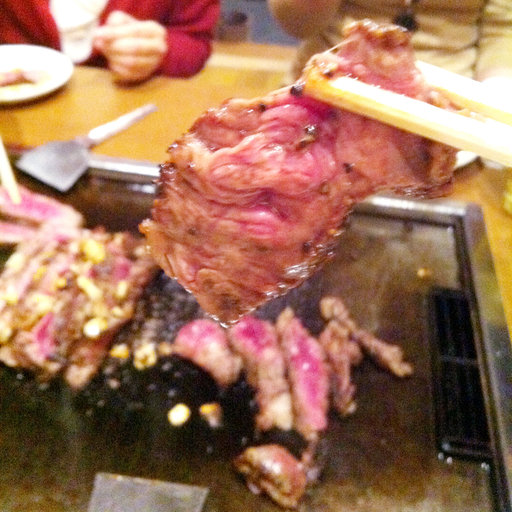

In [6]:
import random
random_image = random.choice(image_path_list)
random_image_class = random_image.parent.stem
img = Image.open(random_image)
img

array([[[116,  27,  13],
        [120,  32,  18],
        [113,  25,  13],
        ...,
        [218, 199, 123],
        [213, 191, 116],
        [205, 183, 108]],

       [[100,  12,   2],
        [111,  23,  13],
        [113,  25,  15],
        ...,
        [215, 195, 124],
        [213, 193, 122],
        [211, 191, 120]],

       [[105,  18,  11],
        [112,  25,  18],
        [110,  23,  14],
        ...,
        [217, 198, 130],
        [219, 201, 135],
        [221, 203, 137]],

       ...,

       [[137, 114,  47],
        [136, 115,  52],
        [120, 101,  43],
        ...,
        [ 46,  55,  54],
        [ 42,  51,  48],
        [ 76,  82,  78]],

       [[150, 126,  66],
        [143, 121,  64],
        [137, 117,  66],
        ...,
        [ 47,  57,  59],
        [ 48,  57,  56],
        [ 77,  86,  85]],

       [[138, 113,  57],
        [143, 120,  68],
        [165, 144,  97],
        ...,
        [ 52,  61,  66],
        [ 49,  59,  61],
        [ 64,  72,  74]]], dtype=uint8)
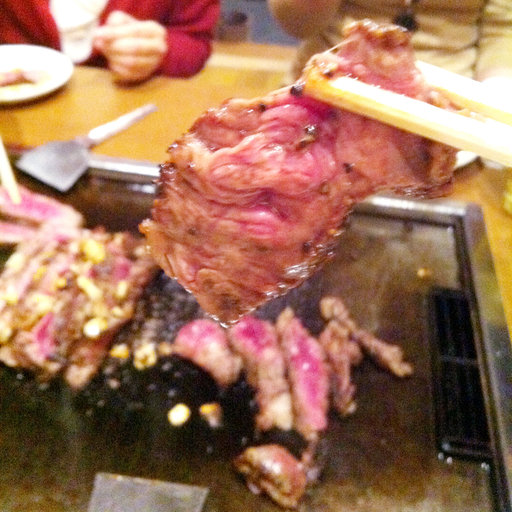

In [7]:
import numpy as np
img_as_array = np.asarray(img)
img_as_array

In [8]:
import torch
from torch.utils.data import dataloader
from torchvision import transforms,datasets

In [9]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [10]:
data_transform(img).shape

torch.Size([3, 64, 64])

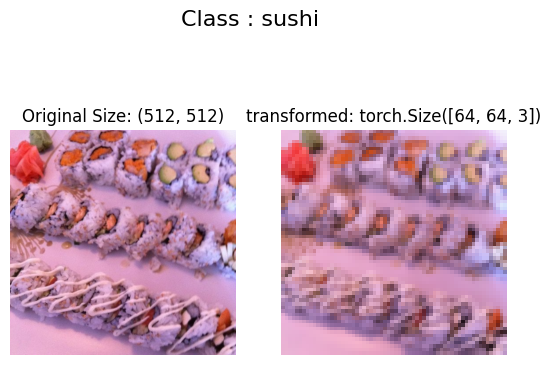

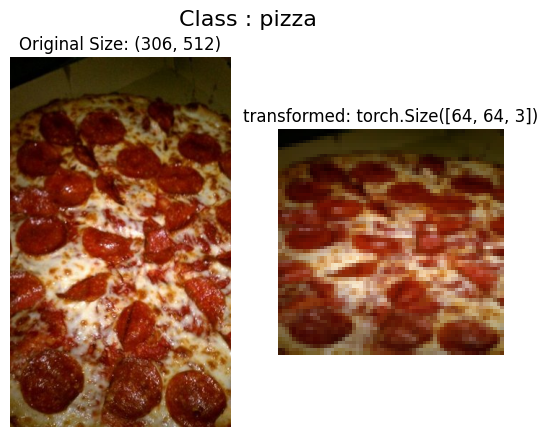

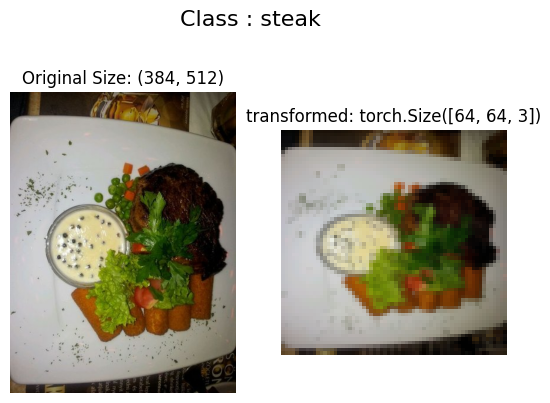

In [11]:
import matplotlib.pyplot as plt
def plot_transformed(image_paths,transforms,n):
  random_image_path = random.sample(image_paths,k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(nrows = 1,ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Size: {f.size}")
      ax[0].axis(False)

      transformed_image = transforms(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"transformed: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class : {image_path.parent.stem}",fontsize=16)
plot_transformed(image_path_list,data_transform,3)

In [12]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transform,
                                  target_transform = None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
train_data.classes,len(train_data)

(['pizza', 'steak', 'sushi'], 225)

In [14]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [15]:
import os
os.cpu_count()

2

In [16]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,batch_size=32,num_workers = 2,shuffle = True)
test_dataloader = DataLoader(dataset = test_data,batch_size=32,num_workers = 2,shuffle=False)

In [17]:
len(train_dataloader),len(test_dataloader)

(8, 3)

In [18]:
img_custom,label_custom = next(iter(train_dataloader))
img_custom.shape,label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [19]:
#data augmentation
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [20]:
train_data_simple = datasets.ImageFolder(root=train_dir,transform = simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,transform = simple_transform)

In [21]:
train_dataloader = DataLoader(dataset = train_data_simple,batch_size=32,num_workers = 2,shuffle = True)
test_dataloader = DataLoader(dataset = test_data_simple,batch_size=32,num_workers = 2,shuffle=False)

In [22]:
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.Convo1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels = hidden_units,
            kernel_size = 3,
            padding = 1,
            stride = 1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            padding = 1,
            stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.Convo2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            padding = 1,
            stride = 1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            padding = 1,
            stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 4096,out_features = output_shape)
    )
  def forward(self,x):
    x = self.Convo1(x)
    #print(x.shape)
    x = self.Convo2(x)
    #print(x.shape)
    x = self.Classifier(x)
    #print(x.shape)
    return x


In [23]:
model = TinyVGG(3,16,3)
model

TinyVGG(
  (Convo1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Convo2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=3, bias=True)
  )
)

In [24]:
image_batch,label_batch = next(iter(train_dataloader))
image_batch.shape

torch.Size([32, 3, 64, 64])

In [25]:
model(image_batch)

tensor([[ 0.0435,  0.0141,  0.0163],
        [ 0.0449,  0.0070,  0.0258],
        [ 0.0376,  0.0116,  0.0217],
        [ 0.0379,  0.0111,  0.0225],
        [ 0.0395,  0.0151,  0.0156],
        [ 0.0411,  0.0114,  0.0133],
        [ 0.0429,  0.0101,  0.0163],
        [ 0.0402,  0.0145,  0.0149],
        [ 0.0476,  0.0131,  0.0150],
        [ 0.0362,  0.0116,  0.0112],
        [ 0.0417,  0.0078,  0.0118],
        [ 0.0320, -0.0024,  0.0240],
        [ 0.0404,  0.0087,  0.0198],
        [ 0.0376,  0.0112,  0.0157],
        [ 0.0388,  0.0078,  0.0199],
        [ 0.0420,  0.0105,  0.0198],
        [ 0.0437,  0.0079,  0.0159],
        [ 0.0438,  0.0128,  0.0163],
        [ 0.0380,  0.0037,  0.0172],
        [ 0.0335,  0.0063,  0.0142],
        [ 0.0377,  0.0048,  0.0149],
        [ 0.0447,  0.0141,  0.0149],
        [ 0.0394,  0.0140,  0.0151],
        [ 0.0353,  0.0125,  0.0168],
        [ 0.0340,  0.0087,  0.0187],
        [ 0.0357,  0.0140,  0.0145],
        [ 0.0473,  0.0123,  0.0114],
 

In [26]:
pip install torchinfo

In [27]:
from torchinfo import summary
summary(model,input_size = [32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 16, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 16, 64, 64]          448
│    └─ReLU: 2-2                         [32, 16, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 16, 64, 64]          2,320
│    └─ReLU: 2-4                         [32, 16, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 16, 32, 32]          --
├─Sequential: 1-2                        [32, 16, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 16, 32, 32]          2,320
│    └─ReLU: 2-7                         [32, 16, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 16, 32, 32]          2,320
│    └─ReLU: 2-9                         [32, 16, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 16, 16, 16]          --
├─Seq

In [28]:
def train_step(model,dataloader,loss_fn,optimizer):
  model.train()
  train_loss,train_acc = 0,0
  for batch,(X,y) in enumerate(dataloader):
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.softmax(y_pred,dim=1).argmax(dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss,train_acc

In [29]:
def test_step(model,dataloader,loss_fn,optimizer):
  model.eval()
  test_loss,test_acc = 0,0
  for batch,(X,y) in enumerate(dataloader):
    with torch.inference_mode:
      y_pred = model(X)
      loss = loss_fn(y_pred,y)
      test_loss+=loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      y_pred_class = (y_pred).argmax(dim=1)
      train_acc+=(y_pred_class==y).sum().item()/len(y_pred_class)
  test_loss = test_loss/len(dataloader)
  test_acc = train_acc/len(dataloader)
  return test_loss,test_acc

In [30]:
def train(model,train_dataloader,test_dataloader,optimizer,loss_fn,epochs):
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]
             }
  for epoch in range(epochs):
    train_loss,train_acc = train_step(model,train_dataloader,loss_fn,optimizer)
    test_loss,test_acc = train_step(model,test_dataloader,loss_fn,optimizer)
    print(f"Epoch = {epoch+1} | Train_loss = {train_loss:.4f} | Train_accuracy = {train_acc:.2f} | Test_loss = {test_loss:.4f} | Test_accuracy = {test_acc:.2f}")
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)
  return results



In [46]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(),lr = 0.001)
model_results = train(model,train_dataloader,test_dataloader,optimizer,loss_fn,10)

Epoch = 1 | Train_loss = 0.9777 | Train_accuracy = 0.49 | Test_loss = 0.8512 | Test_accuracy = 0.60
Epoch = 2 | Train_loss = 0.8543 | Train_accuracy = 0.55 | Test_loss = 0.6926 | Test_accuracy = 0.77
Epoch = 3 | Train_loss = 0.7875 | Train_accuracy = 0.67 | Test_loss = 0.6386 | Test_accuracy = 0.73
Epoch = 4 | Train_loss = 0.8385 | Train_accuracy = 0.55 | Test_loss = 0.9038 | Test_accuracy = 0.53
Epoch = 5 | Train_loss = 0.8312 | Train_accuracy = 0.60 | Test_loss = 0.5585 | Test_accuracy = 0.79
Epoch = 6 | Train_loss = 0.7752 | Train_accuracy = 0.65 | Test_loss = 0.5961 | Test_accuracy = 0.90
Epoch = 7 | Train_loss = 0.7156 | Train_accuracy = 0.71 | Test_loss = 0.5067 | Test_accuracy = 0.91
Epoch = 8 | Train_loss = 0.7646 | Train_accuracy = 0.68 | Test_loss = 0.4691 | Test_accuracy = 0.88
Epoch = 9 | Train_loss = 0.7608 | Train_accuracy = 0.59 | Test_loss = 0.4901 | Test_accuracy = 0.89
Epoch = 10 | Train_loss = 0.8527 | Train_accuracy = 0.70 | Test_loss = 0.5326 | Test_accuracy = 0.84

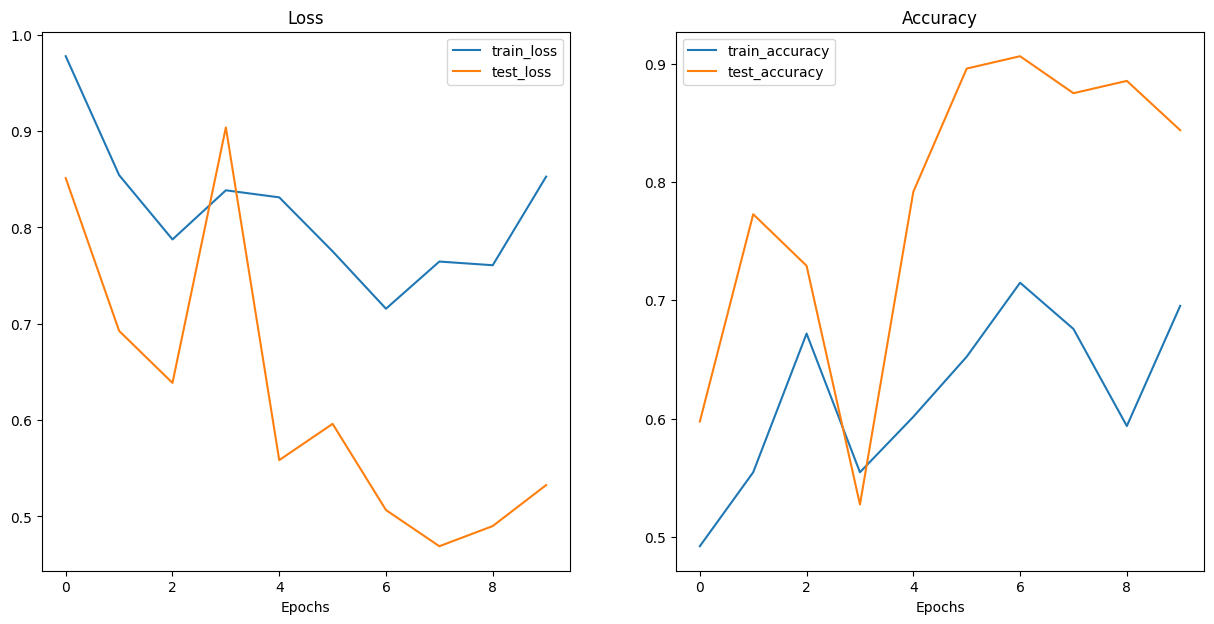

In [47]:
def plot_loss_curves(results):

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
plot_loss_curves(model_results)

In [33]:
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

train_data_simple = datasets.ImageFolder(root=train_dir,transform = train_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,transform = test_transform)

train_dataloader = DataLoader(dataset = train_data_simple,batch_size=32,num_workers = 2,shuffle = True)
test_dataloader = DataLoader(dataset = test_data_simple,batch_size=32,num_workers = 2,shuffle=False)
model2 = TinyVGG(3,16,3)

In [34]:
model_results = train(model2,train_dataloader,test_dataloader,optimizer,loss_fn,20)

Epoch = 1 | Train_loss = 1.1006 | Train_accuracy = 0.34 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 2 | Train_loss = 1.0975 | Train_accuracy = 0.30 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 3 | Train_loss = 1.0975 | Train_accuracy = 0.31 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 4 | Train_loss = 1.0972 | Train_accuracy = 0.43 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 5 | Train_loss = 1.0973 | Train_accuracy = 0.43 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 6 | Train_loss = 1.0974 | Train_accuracy = 0.43 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 7 | Train_loss = 1.0972 | Train_accuracy = 0.41 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 8 | Train_loss = 1.1005 | Train_accuracy = 0.32 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 9 | Train_loss = 1.0974 | Train_accuracy = 0.45 | Test_loss = 1.0957 | Test_accuracy = 0.35
Epoch = 10 | Train_loss = 1.0974 | Train_accuracy = 0.33 | Test_loss = 1.0957 | Test_accuracy = 0.35

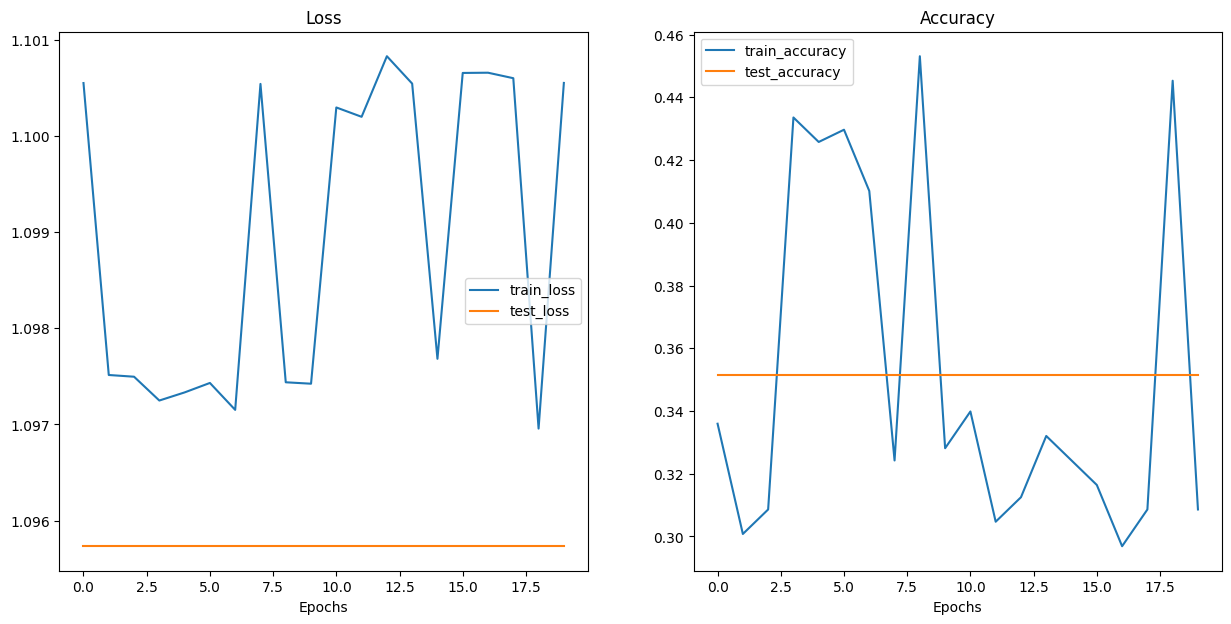

In [35]:
plot_loss_curves(model_results)

In [36]:
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [37]:
import torchvision
custom_image = torchvision.io.read_image(custom_image_path).type(torch.float32)/255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [38]:
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])
print(custom_image.shape)
transformed_image = custom_image_transform(custom_image).unsqueeze(0)
print(transformed_image.shape)

torch.Size([3, 4032, 3024])
torch.Size([1, 3, 64, 64])


In [39]:
model.eval()
with torch.inference_mode():
  custom_image_pred = model(transformed_image)
custom_image_pred

tensor([[-0.4607, -0.3000, -0.1615]])

In [40]:
y_pred = torch.softmax(custom_image_pred,dim=1)
y_pred

tensor([[0.2838, 0.3333, 0.3828]])

In [41]:
y_pred = y_pred.argmax(dim=1)
y_pred

tensor([2])

In [42]:
class_names[y_pred]

'Sushi'